# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

#helper.download_extract('mnist', data_dir)
#helper.download_extract('celeba', data_dir)

## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

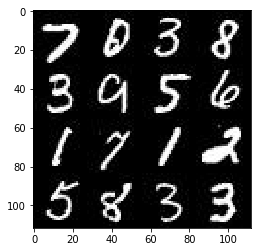

In [2]:
show_n_images = 16

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

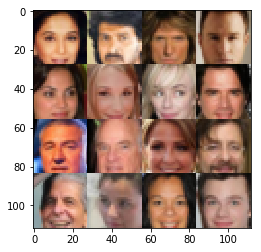

In [3]:
show_n_images = 16

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.2.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    input_real = tf.placeholder(tf.float32, shape=(None, image_height, image_width, image_channels))
    input_z = tf.placeholder(tf.float32, shape=(None, z_dim))
    learning_rate = tf.placeholder(tf.float32, shape=())

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def lrelu(x, alpha):
    return tf.maximum(x * alpha, x)

def discriminator(images, reuse=False, alpha=0.1):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    kinit = tf.random_normal_initializer(stddev=0.02)
    
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input is 28x28x3
        
        # Hidden layer 1
        x = tf.layers.conv2d(images, 64, 5, strides=2, kernel_initializer=kinit, padding='same')
        x = lrelu(x, alpha)
        # 14x14x64
        
        # Hidden Layer 2
        x = tf.layers.conv2d(x, 128, 5, strides=2, kernel_initializer=kinit, padding='same')
        x = lrelu(x, alpha)
        x = tf.layers.batch_normalization(x, training=True)
        # 7x7x128
        
        # Hidden Layer 3
        x = tf.layers.conv2d(x, 256, 5, strides=2, kernel_initializer=kinit, padding='same')
        x = lrelu(x, alpha)
        x = tf.layers.batch_normalization(x, training=True)
        # 4x4x256
        
        
        #Flatten
        x = tf.reshape(x, (-1, 4*4*256))
        logits = tf.layers.dense(x, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True, alpha=0.1):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    kinit = tf.random_normal_initializer(stddev=0.02)
    
    with tf.variable_scope('generator', reuse=(not is_train)):
        
        # fully connected layer
        x = tf.layers.dense(z, 7*7*256)
        
        # Hidden 1 - Reshape 
        x = tf.reshape(x, (-1, 7, 7, 256))
        x = lrelu(x, alpha)
        x = tf.layers.batch_normalization(x, training=is_train)
        # 7x7x256
        
        # Hidden Layer 2
        x = tf.layers.conv2d_transpose(x, 128, 5, strides=2, kernel_initializer=kinit, padding='same')
        x = lrelu(x, alpha)
        x = tf.layers.batch_normalization(x, training=is_train)
        # 14x14x128
        
        # Hidden Layer 3
        x = tf.layers.conv2d_transpose(x, 64, 5, strides=2, kernel_initializer=kinit, padding='same')
        x = lrelu(x, alpha)
        x = tf.layers.batch_normalization(x, training=is_train)
        # 28x28x64
        
        
        
        # Output layer, 28x28x5
        logits = tf.layers.conv2d_transpose(x, out_channel_dim, 3, strides=1, kernel_initializer=kinit, padding='same')
        # 28x28x3
        
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.1):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    smooth = 0.1
    
    # Generator  
    g_model = generator(input_z, out_channel_dim, is_train=True)

    # Disriminator 
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    # Calculate loss
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_logits_real) * (1 - smooth)))

    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_logits_fake)))

    d_loss = d_loss_real + d_loss_fake

    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_logits_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    d_updates = [opt for opt in update_ops if opt.name.startswith('discriminator')]
    g_updates = [opt for opt in update_ops if opt.name.startswith('generator')]
    
    
    # Optimize
    
    with tf.control_dependencies(d_updates):
        d_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)

    with tf.control_dependencies(g_updates):
        g_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
            
    return d_opt, g_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3], alpha=0.2)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)    
    
    steps = 0
    print_every=10
    show_every=100
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2.0
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z})

                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i + 1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.0912... Generator Loss: 0.8560
Epoch 1/2... Discriminator Loss: 0.5465... Generator Loss: 1.9401
Epoch 1/2... Discriminator Loss: 0.4671... Generator Loss: 2.5411
Epoch 1/2... Discriminator Loss: 0.4399... Generator Loss: 2.9600
Epoch 1/2... Discriminator Loss: 0.4137... Generator Loss: 3.4330
Epoch 1/2... Discriminator Loss: 0.4078... Generator Loss: 3.6009
Epoch 1/2... Discriminator Loss: 0.3689... Generator Loss: 4.2663
Epoch 1/2... Discriminator Loss: 0.3573... Generator Loss: 4.7878
Epoch 1/2... Discriminator Loss: 0.3782... Generator Loss: 5.1483
Epoch 1/2... Discriminator Loss: 0.4233... Generator Loss: 4.5471


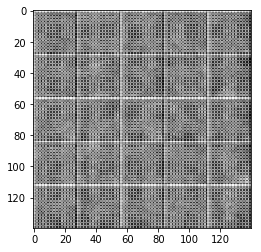

Epoch 1/2... Discriminator Loss: 0.3543... Generator Loss: 4.4035
Epoch 1/2... Discriminator Loss: 0.4055... Generator Loss: 4.6081
Epoch 1/2... Discriminator Loss: 0.4543... Generator Loss: 4.2668
Epoch 1/2... Discriminator Loss: 0.3807... Generator Loss: 4.9423
Epoch 1/2... Discriminator Loss: 0.3743... Generator Loss: 3.9773
Epoch 1/2... Discriminator Loss: 0.3716... Generator Loss: 4.0988
Epoch 1/2... Discriminator Loss: 0.3836... Generator Loss: 4.0253
Epoch 1/2... Discriminator Loss: 0.6257... Generator Loss: 3.0915
Epoch 1/2... Discriminator Loss: 0.3797... Generator Loss: 4.0804
Epoch 1/2... Discriminator Loss: 0.3564... Generator Loss: 4.2634


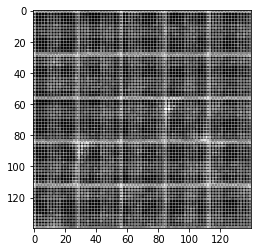

Epoch 1/2... Discriminator Loss: 0.3846... Generator Loss: 3.4590
Epoch 1/2... Discriminator Loss: 0.3891... Generator Loss: 3.3336
Epoch 1/2... Discriminator Loss: 0.4569... Generator Loss: 3.0566
Epoch 1/2... Discriminator Loss: 0.6117... Generator Loss: 1.6939
Epoch 1/2... Discriminator Loss: 0.3739... Generator Loss: 3.5756
Epoch 1/2... Discriminator Loss: 0.3896... Generator Loss: 3.9786
Epoch 1/2... Discriminator Loss: 0.4077... Generator Loss: 2.9346
Epoch 1/2... Discriminator Loss: 0.4188... Generator Loss: 3.3418
Epoch 1/2... Discriminator Loss: 0.4086... Generator Loss: 3.2135
Epoch 1/2... Discriminator Loss: 0.5952... Generator Loss: 2.3456


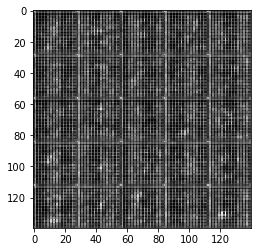

Epoch 1/2... Discriminator Loss: 0.4685... Generator Loss: 2.4786
Epoch 1/2... Discriminator Loss: 1.6706... Generator Loss: 0.4634
Epoch 1/2... Discriminator Loss: 0.4572... Generator Loss: 2.9669
Epoch 1/2... Discriminator Loss: 0.6529... Generator Loss: 1.6094
Epoch 1/2... Discriminator Loss: 0.5367... Generator Loss: 3.2819
Epoch 1/2... Discriminator Loss: 1.0278... Generator Loss: 2.8109
Epoch 1/2... Discriminator Loss: 0.6009... Generator Loss: 1.8063
Epoch 1/2... Discriminator Loss: 0.4727... Generator Loss: 2.8827
Epoch 1/2... Discriminator Loss: 1.1117... Generator Loss: 0.8467
Epoch 1/2... Discriminator Loss: 0.7975... Generator Loss: 1.1812


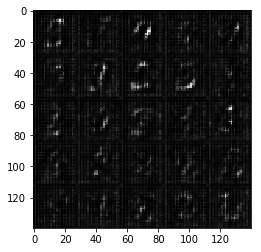

Epoch 1/2... Discriminator Loss: 0.4862... Generator Loss: 2.5534
Epoch 1/2... Discriminator Loss: 0.6919... Generator Loss: 2.3312
Epoch 1/2... Discriminator Loss: 0.6679... Generator Loss: 2.0763
Epoch 1/2... Discriminator Loss: 1.1270... Generator Loss: 0.7678
Epoch 1/2... Discriminator Loss: 0.6374... Generator Loss: 1.6814
Epoch 1/2... Discriminator Loss: 0.5595... Generator Loss: 2.7399
Epoch 1/2... Discriminator Loss: 0.8652... Generator Loss: 1.1696
Epoch 1/2... Discriminator Loss: 0.6153... Generator Loss: 2.3275
Epoch 1/2... Discriminator Loss: 0.5873... Generator Loss: 2.0649
Epoch 1/2... Discriminator Loss: 0.5390... Generator Loss: 2.0889


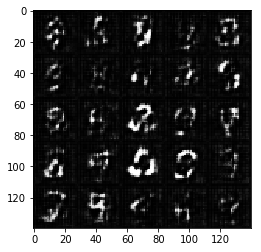

Epoch 1/2... Discriminator Loss: 0.6568... Generator Loss: 1.8823
Epoch 1/2... Discriminator Loss: 0.7855... Generator Loss: 1.3097
Epoch 1/2... Discriminator Loss: 0.5896... Generator Loss: 2.2527
Epoch 1/2... Discriminator Loss: 0.5064... Generator Loss: 2.3318
Epoch 1/2... Discriminator Loss: 0.5484... Generator Loss: 2.9041
Epoch 1/2... Discriminator Loss: 0.8285... Generator Loss: 1.2446
Epoch 1/2... Discriminator Loss: 0.7322... Generator Loss: 1.4460
Epoch 1/2... Discriminator Loss: 0.5662... Generator Loss: 2.2066
Epoch 1/2... Discriminator Loss: 0.5427... Generator Loss: 1.9234
Epoch 1/2... Discriminator Loss: 0.4962... Generator Loss: 2.7500


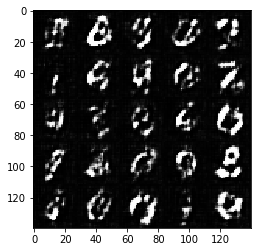

Epoch 1/2... Discriminator Loss: 0.6787... Generator Loss: 1.4512
Epoch 1/2... Discriminator Loss: 0.5502... Generator Loss: 2.3475
Epoch 1/2... Discriminator Loss: 0.8560... Generator Loss: 1.1250
Epoch 1/2... Discriminator Loss: 0.5400... Generator Loss: 2.1115
Epoch 1/2... Discriminator Loss: 0.7890... Generator Loss: 1.2717
Epoch 1/2... Discriminator Loss: 0.8940... Generator Loss: 1.0891
Epoch 1/2... Discriminator Loss: 0.5745... Generator Loss: 1.9383
Epoch 1/2... Discriminator Loss: 0.6984... Generator Loss: 1.5809
Epoch 1/2... Discriminator Loss: 0.6231... Generator Loss: 1.7845
Epoch 1/2... Discriminator Loss: 0.8018... Generator Loss: 1.2550


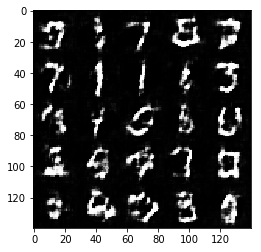

Epoch 1/2... Discriminator Loss: 1.3531... Generator Loss: 0.6257
Epoch 1/2... Discriminator Loss: 0.6189... Generator Loss: 1.8846
Epoch 1/2... Discriminator Loss: 0.6175... Generator Loss: 1.9655
Epoch 1/2... Discriminator Loss: 0.5651... Generator Loss: 1.9976
Epoch 1/2... Discriminator Loss: 0.6587... Generator Loss: 2.4025
Epoch 1/2... Discriminator Loss: 0.6625... Generator Loss: 1.6660
Epoch 1/2... Discriminator Loss: 0.6689... Generator Loss: 1.7573
Epoch 1/2... Discriminator Loss: 0.9712... Generator Loss: 0.9761
Epoch 1/2... Discriminator Loss: 1.4240... Generator Loss: 0.5746
Epoch 1/2... Discriminator Loss: 0.7777... Generator Loss: 1.2750


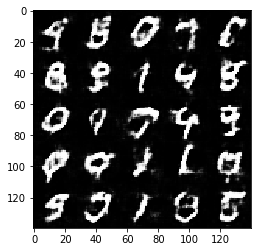

Epoch 1/2... Discriminator Loss: 0.7809... Generator Loss: 1.2803
Epoch 1/2... Discriminator Loss: 0.7154... Generator Loss: 1.7023
Epoch 1/2... Discriminator Loss: 0.6175... Generator Loss: 2.0468
Epoch 1/2... Discriminator Loss: 0.7068... Generator Loss: 1.4758
Epoch 1/2... Discriminator Loss: 0.6133... Generator Loss: 1.8275
Epoch 1/2... Discriminator Loss: 0.8057... Generator Loss: 1.9131
Epoch 1/2... Discriminator Loss: 1.1034... Generator Loss: 2.2280
Epoch 1/2... Discriminator Loss: 0.7425... Generator Loss: 1.4017
Epoch 1/2... Discriminator Loss: 0.7909... Generator Loss: 2.1114
Epoch 1/2... Discriminator Loss: 0.7615... Generator Loss: 1.6243


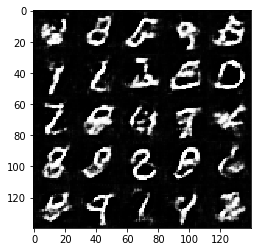

Epoch 1/2... Discriminator Loss: 0.7142... Generator Loss: 1.5428
Epoch 1/2... Discriminator Loss: 0.7285... Generator Loss: 1.6315
Epoch 1/2... Discriminator Loss: 0.8513... Generator Loss: 1.1745
Epoch 2/2... Discriminator Loss: 0.8359... Generator Loss: 1.2556
Epoch 2/2... Discriminator Loss: 0.7212... Generator Loss: 2.0294
Epoch 2/2... Discriminator Loss: 0.6761... Generator Loss: 1.6322
Epoch 2/2... Discriminator Loss: 0.7855... Generator Loss: 1.3780
Epoch 2/2... Discriminator Loss: 0.7756... Generator Loss: 1.2766
Epoch 2/2... Discriminator Loss: 1.1898... Generator Loss: 2.7529
Epoch 2/2... Discriminator Loss: 1.0102... Generator Loss: 0.8906


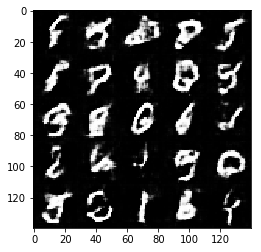

Epoch 2/2... Discriminator Loss: 0.7392... Generator Loss: 2.1501
Epoch 2/2... Discriminator Loss: 0.6092... Generator Loss: 2.0285
Epoch 2/2... Discriminator Loss: 0.7478... Generator Loss: 1.7093
Epoch 2/2... Discriminator Loss: 0.8353... Generator Loss: 1.1996
Epoch 2/2... Discriminator Loss: 0.6612... Generator Loss: 2.3607
Epoch 2/2... Discriminator Loss: 1.0410... Generator Loss: 0.8593
Epoch 2/2... Discriminator Loss: 0.8085... Generator Loss: 1.5289
Epoch 2/2... Discriminator Loss: 0.7365... Generator Loss: 1.4396
Epoch 2/2... Discriminator Loss: 0.6429... Generator Loss: 1.8026
Epoch 2/2... Discriminator Loss: 0.8374... Generator Loss: 1.3528


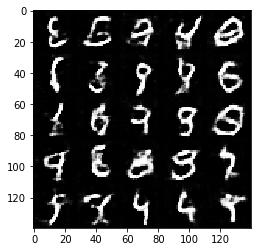

Epoch 2/2... Discriminator Loss: 0.7617... Generator Loss: 1.4372
Epoch 2/2... Discriminator Loss: 0.6351... Generator Loss: 1.6986
Epoch 2/2... Discriminator Loss: 0.7154... Generator Loss: 1.8244
Epoch 2/2... Discriminator Loss: 0.7098... Generator Loss: 1.4940
Epoch 2/2... Discriminator Loss: 0.8119... Generator Loss: 1.3113
Epoch 2/2... Discriminator Loss: 0.7073... Generator Loss: 2.0688
Epoch 2/2... Discriminator Loss: 1.0210... Generator Loss: 0.9722
Epoch 2/2... Discriminator Loss: 1.0400... Generator Loss: 0.8886
Epoch 2/2... Discriminator Loss: 0.7697... Generator Loss: 1.7299
Epoch 2/2... Discriminator Loss: 0.6395... Generator Loss: 1.8536


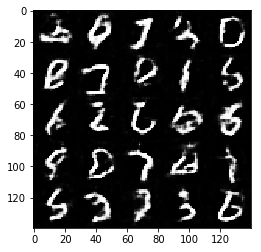

Epoch 2/2... Discriminator Loss: 0.6681... Generator Loss: 2.1081
Epoch 2/2... Discriminator Loss: 0.7100... Generator Loss: 2.1410
Epoch 2/2... Discriminator Loss: 0.7861... Generator Loss: 1.3887
Epoch 2/2... Discriminator Loss: 0.9974... Generator Loss: 0.9542
Epoch 2/2... Discriminator Loss: 1.0884... Generator Loss: 2.8131
Epoch 2/2... Discriminator Loss: 0.7712... Generator Loss: 1.8163
Epoch 2/2... Discriminator Loss: 0.9538... Generator Loss: 1.0085
Epoch 2/2... Discriminator Loss: 0.9448... Generator Loss: 1.0152
Epoch 2/2... Discriminator Loss: 0.9970... Generator Loss: 2.7167
Epoch 2/2... Discriminator Loss: 0.8652... Generator Loss: 2.2823


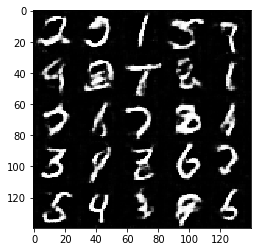

Epoch 2/2... Discriminator Loss: 0.8101... Generator Loss: 1.3052
Epoch 2/2... Discriminator Loss: 1.1124... Generator Loss: 0.8024
Epoch 2/2... Discriminator Loss: 0.7024... Generator Loss: 1.5104
Epoch 2/2... Discriminator Loss: 0.6777... Generator Loss: 1.7387
Epoch 2/2... Discriminator Loss: 0.9491... Generator Loss: 1.0995
Epoch 2/2... Discriminator Loss: 0.8360... Generator Loss: 1.2970
Epoch 2/2... Discriminator Loss: 0.6640... Generator Loss: 1.6977
Epoch 2/2... Discriminator Loss: 0.6336... Generator Loss: 2.2359
Epoch 2/2... Discriminator Loss: 0.8538... Generator Loss: 2.4628
Epoch 2/2... Discriminator Loss: 0.7939... Generator Loss: 2.0372


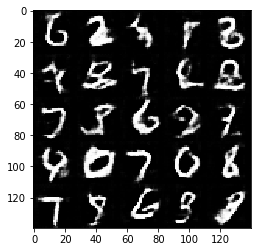

Epoch 2/2... Discriminator Loss: 0.7999... Generator Loss: 1.4471
Epoch 2/2... Discriminator Loss: 0.7808... Generator Loss: 1.2131
Epoch 2/2... Discriminator Loss: 0.8464... Generator Loss: 1.3081
Epoch 2/2... Discriminator Loss: 0.5805... Generator Loss: 1.9953
Epoch 2/2... Discriminator Loss: 0.7563... Generator Loss: 2.3221
Epoch 2/2... Discriminator Loss: 0.7612... Generator Loss: 1.4389
Epoch 2/2... Discriminator Loss: 0.7559... Generator Loss: 1.3834
Epoch 2/2... Discriminator Loss: 0.7421... Generator Loss: 1.5214
Epoch 2/2... Discriminator Loss: 0.6563... Generator Loss: 1.8271
Epoch 2/2... Discriminator Loss: 0.6783... Generator Loss: 1.6044


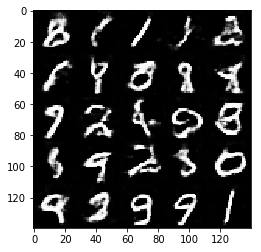

Epoch 2/2... Discriminator Loss: 1.0996... Generator Loss: 0.8174
Epoch 2/2... Discriminator Loss: 0.6788... Generator Loss: 1.9007
Epoch 2/2... Discriminator Loss: 0.7523... Generator Loss: 1.4630
Epoch 2/2... Discriminator Loss: 0.6416... Generator Loss: 1.9614
Epoch 2/2... Discriminator Loss: 0.6692... Generator Loss: 1.5806
Epoch 2/2... Discriminator Loss: 0.7749... Generator Loss: 1.5306
Epoch 2/2... Discriminator Loss: 0.8500... Generator Loss: 1.2702
Epoch 2/2... Discriminator Loss: 0.7573... Generator Loss: 1.7941
Epoch 2/2... Discriminator Loss: 0.9925... Generator Loss: 0.9855
Epoch 2/2... Discriminator Loss: 0.7061... Generator Loss: 1.8968


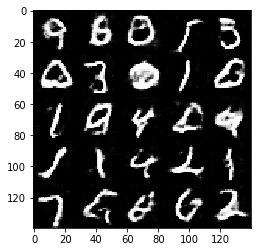

Epoch 2/2... Discriminator Loss: 0.9991... Generator Loss: 0.8789
Epoch 2/2... Discriminator Loss: 0.8477... Generator Loss: 1.1736
Epoch 2/2... Discriminator Loss: 0.8226... Generator Loss: 1.4367
Epoch 2/2... Discriminator Loss: 0.7811... Generator Loss: 1.3258
Epoch 2/2... Discriminator Loss: 0.6287... Generator Loss: 1.8675
Epoch 2/2... Discriminator Loss: 0.6617... Generator Loss: 1.5811
Epoch 2/2... Discriminator Loss: 0.7464... Generator Loss: 1.3902
Epoch 2/2... Discriminator Loss: 0.6737... Generator Loss: 1.9312
Epoch 2/2... Discriminator Loss: 0.6309... Generator Loss: 1.7750
Epoch 2/2... Discriminator Loss: 0.8385... Generator Loss: 1.1529


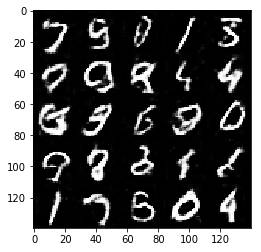

Epoch 2/2... Discriminator Loss: 0.7485... Generator Loss: 1.4332
Epoch 2/2... Discriminator Loss: 0.9234... Generator Loss: 0.9960
Epoch 2/2... Discriminator Loss: 1.3695... Generator Loss: 0.7387
Epoch 2/2... Discriminator Loss: 0.8371... Generator Loss: 1.2539
Epoch 2/2... Discriminator Loss: 0.9974... Generator Loss: 2.3002
Epoch 2/2... Discriminator Loss: 0.7421... Generator Loss: 1.4721
Epoch 2/2... Discriminator Loss: 0.6435... Generator Loss: 1.8877
Epoch 2/2... Discriminator Loss: 0.6329... Generator Loss: 1.9732
Epoch 2/2... Discriminator Loss: 0.5494... Generator Loss: 2.2103
Epoch 2/2... Discriminator Loss: 0.5530... Generator Loss: 2.0668


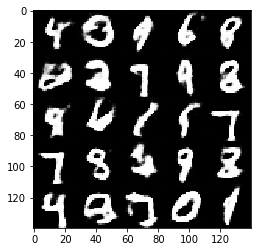

Epoch 2/2... Discriminator Loss: 0.9184... Generator Loss: 1.0735
Epoch 2/2... Discriminator Loss: 1.0181... Generator Loss: 0.9109
Epoch 2/2... Discriminator Loss: 0.6813... Generator Loss: 1.6510
Epoch 2/2... Discriminator Loss: 0.7616... Generator Loss: 1.9546
Epoch 2/2... Discriminator Loss: 0.8617... Generator Loss: 2.2867
Epoch 2/2... Discriminator Loss: 0.8391... Generator Loss: 1.2361
Epoch 2/2... Discriminator Loss: 0.7288... Generator Loss: 1.4332


In [24]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.2544... Generator Loss: 0.7280
Epoch 1/1... Discriminator Loss: 0.7872... Generator Loss: 1.3568
Epoch 1/1... Discriminator Loss: 0.5951... Generator Loss: 1.9299
Epoch 1/1... Discriminator Loss: 0.6444... Generator Loss: 1.7913
Epoch 1/1... Discriminator Loss: 0.4850... Generator Loss: 2.4076
Epoch 1/1... Discriminator Loss: 0.4282... Generator Loss: 2.9226
Epoch 1/1... Discriminator Loss: 0.4141... Generator Loss: 3.1211
Epoch 1/1... Discriminator Loss: 0.4045... Generator Loss: 3.4654
Epoch 1/1... Discriminator Loss: 0.6799... Generator Loss: 1.7743
Epoch 1/1... Discriminator Loss: 0.4083... Generator Loss: 3.3673


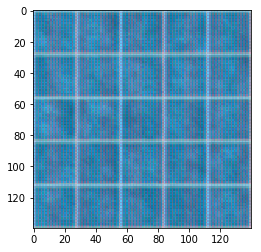

Epoch 1/1... Discriminator Loss: 0.4039... Generator Loss: 5.0161
Epoch 1/1... Discriminator Loss: 0.3814... Generator Loss: 3.8259
Epoch 1/1... Discriminator Loss: 0.3789... Generator Loss: 3.7136
Epoch 1/1... Discriminator Loss: 0.4235... Generator Loss: 5.9657
Epoch 1/1... Discriminator Loss: 0.3855... Generator Loss: 3.4350
Epoch 1/1... Discriminator Loss: 0.4370... Generator Loss: 3.0985
Epoch 1/1... Discriminator Loss: 0.4397... Generator Loss: 3.0425
Epoch 1/1... Discriminator Loss: 0.7360... Generator Loss: 2.1779
Epoch 1/1... Discriminator Loss: 0.3991... Generator Loss: 3.7137
Epoch 1/1... Discriminator Loss: 0.4246... Generator Loss: 3.3084


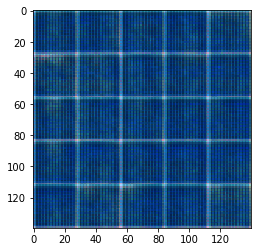

Epoch 1/1... Discriminator Loss: 0.4277... Generator Loss: 3.1742
Epoch 1/1... Discriminator Loss: 0.4312... Generator Loss: 3.5289
Epoch 1/1... Discriminator Loss: 1.5640... Generator Loss: 0.5926
Epoch 1/1... Discriminator Loss: 0.4585... Generator Loss: 2.8728
Epoch 1/1... Discriminator Loss: 0.5224... Generator Loss: 2.1331
Epoch 1/1... Discriminator Loss: 0.6427... Generator Loss: 2.1002
Epoch 1/1... Discriminator Loss: 0.5553... Generator Loss: 2.0520
Epoch 1/1... Discriminator Loss: 1.3059... Generator Loss: 0.6586
Epoch 1/1... Discriminator Loss: 0.4797... Generator Loss: 2.6743
Epoch 1/1... Discriminator Loss: 0.5070... Generator Loss: 2.5234


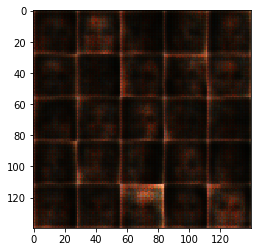

Epoch 1/1... Discriminator Loss: 0.7348... Generator Loss: 1.3455
Epoch 1/1... Discriminator Loss: 0.7476... Generator Loss: 2.4537
Epoch 1/1... Discriminator Loss: 0.5117... Generator Loss: 2.9538
Epoch 1/1... Discriminator Loss: 0.7597... Generator Loss: 1.4168
Epoch 1/1... Discriminator Loss: 1.3163... Generator Loss: 0.7605
Epoch 1/1... Discriminator Loss: 0.7167... Generator Loss: 1.5137
Epoch 1/1... Discriminator Loss: 1.0701... Generator Loss: 0.9001
Epoch 1/1... Discriminator Loss: 0.5751... Generator Loss: 2.0809
Epoch 1/1... Discriminator Loss: 0.7754... Generator Loss: 3.5837
Epoch 1/1... Discriminator Loss: 0.7185... Generator Loss: 1.5626


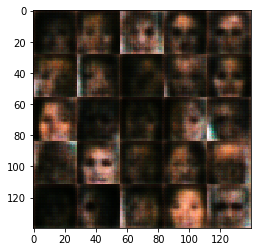

Epoch 1/1... Discriminator Loss: 0.6110... Generator Loss: 2.8407
Epoch 1/1... Discriminator Loss: 1.9317... Generator Loss: 0.3299
Epoch 1/1... Discriminator Loss: 0.8167... Generator Loss: 1.3835
Epoch 1/1... Discriminator Loss: 0.9088... Generator Loss: 1.6444
Epoch 1/1... Discriminator Loss: 1.0329... Generator Loss: 2.0884
Epoch 1/1... Discriminator Loss: 0.7819... Generator Loss: 1.4224
Epoch 1/1... Discriminator Loss: 0.7089... Generator Loss: 2.7869
Epoch 1/1... Discriminator Loss: 0.7092... Generator Loss: 1.5371
Epoch 1/1... Discriminator Loss: 0.8836... Generator Loss: 1.3304
Epoch 1/1... Discriminator Loss: 0.7056... Generator Loss: 1.8405


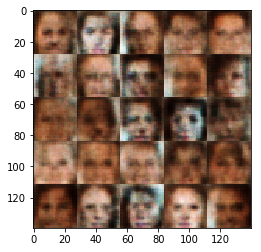

Epoch 1/1... Discriminator Loss: 0.8297... Generator Loss: 1.6990
Epoch 1/1... Discriminator Loss: 0.8662... Generator Loss: 1.2683
Epoch 1/1... Discriminator Loss: 0.7429... Generator Loss: 1.8325
Epoch 1/1... Discriminator Loss: 0.9211... Generator Loss: 1.0547
Epoch 1/1... Discriminator Loss: 0.8499... Generator Loss: 1.6505
Epoch 1/1... Discriminator Loss: 0.7858... Generator Loss: 1.7756
Epoch 1/1... Discriminator Loss: 0.7290... Generator Loss: 2.0416
Epoch 1/1... Discriminator Loss: 0.8232... Generator Loss: 1.8260
Epoch 1/1... Discriminator Loss: 0.8532... Generator Loss: 1.8617
Epoch 1/1... Discriminator Loss: 0.9007... Generator Loss: 1.3142


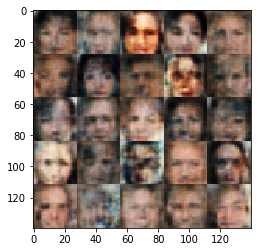

Epoch 1/1... Discriminator Loss: 0.7903... Generator Loss: 1.4821
Epoch 1/1... Discriminator Loss: 0.7671... Generator Loss: 1.7623
Epoch 1/1... Discriminator Loss: 0.8445... Generator Loss: 1.1969
Epoch 1/1... Discriminator Loss: 1.1941... Generator Loss: 0.7044
Epoch 1/1... Discriminator Loss: 0.9665... Generator Loss: 1.0748
Epoch 1/1... Discriminator Loss: 0.8977... Generator Loss: 1.1036
Epoch 1/1... Discriminator Loss: 0.7933... Generator Loss: 1.5364
Epoch 1/1... Discriminator Loss: 1.0599... Generator Loss: 0.8273
Epoch 1/1... Discriminator Loss: 0.9786... Generator Loss: 2.0008
Epoch 1/1... Discriminator Loss: 1.2884... Generator Loss: 0.7020


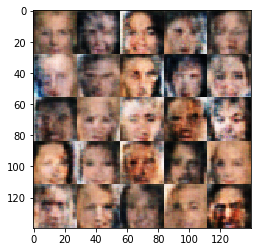

Epoch 1/1... Discriminator Loss: 0.9414... Generator Loss: 2.1078
Epoch 1/1... Discriminator Loss: 1.1470... Generator Loss: 1.9616
Epoch 1/1... Discriminator Loss: 1.0681... Generator Loss: 1.0824
Epoch 1/1... Discriminator Loss: 1.0126... Generator Loss: 1.9569
Epoch 1/1... Discriminator Loss: 0.9785... Generator Loss: 1.5271
Epoch 1/1... Discriminator Loss: 0.9605... Generator Loss: 1.0953
Epoch 1/1... Discriminator Loss: 1.0115... Generator Loss: 1.2001
Epoch 1/1... Discriminator Loss: 0.9784... Generator Loss: 0.9865
Epoch 1/1... Discriminator Loss: 0.8694... Generator Loss: 1.3793
Epoch 1/1... Discriminator Loss: 0.9236... Generator Loss: 1.3212


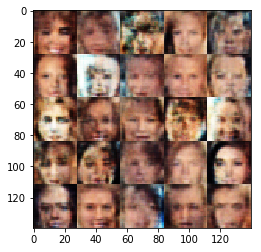

Epoch 1/1... Discriminator Loss: 1.0121... Generator Loss: 0.9748
Epoch 1/1... Discriminator Loss: 0.9316... Generator Loss: 1.2161
Epoch 1/1... Discriminator Loss: 0.9887... Generator Loss: 1.3931
Epoch 1/1... Discriminator Loss: 0.9403... Generator Loss: 1.1492
Epoch 1/1... Discriminator Loss: 0.9841... Generator Loss: 1.1308
Epoch 1/1... Discriminator Loss: 1.1332... Generator Loss: 1.6979
Epoch 1/1... Discriminator Loss: 1.0468... Generator Loss: 1.0442
Epoch 1/1... Discriminator Loss: 1.0204... Generator Loss: 1.1005
Epoch 1/1... Discriminator Loss: 0.9685... Generator Loss: 1.2713
Epoch 1/1... Discriminator Loss: 0.9172... Generator Loss: 1.8960


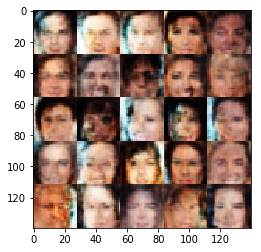

Epoch 1/1... Discriminator Loss: 1.0793... Generator Loss: 1.0639
Epoch 1/1... Discriminator Loss: 0.9806... Generator Loss: 1.2129
Epoch 1/1... Discriminator Loss: 1.0870... Generator Loss: 0.8562
Epoch 1/1... Discriminator Loss: 0.9379... Generator Loss: 1.2622
Epoch 1/1... Discriminator Loss: 0.9924... Generator Loss: 1.0555
Epoch 1/1... Discriminator Loss: 1.1100... Generator Loss: 0.8993
Epoch 1/1... Discriminator Loss: 1.1280... Generator Loss: 0.7991
Epoch 1/1... Discriminator Loss: 1.0211... Generator Loss: 1.4092
Epoch 1/1... Discriminator Loss: 0.9106... Generator Loss: 1.1288
Epoch 1/1... Discriminator Loss: 1.2107... Generator Loss: 0.6947


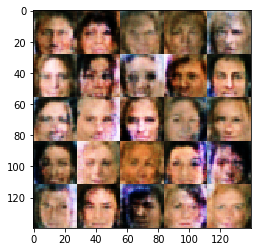

Epoch 1/1... Discriminator Loss: 1.0521... Generator Loss: 0.9863
Epoch 1/1... Discriminator Loss: 0.8980... Generator Loss: 1.5160
Epoch 1/1... Discriminator Loss: 1.0813... Generator Loss: 0.9244
Epoch 1/1... Discriminator Loss: 1.0970... Generator Loss: 0.8828
Epoch 1/1... Discriminator Loss: 0.9517... Generator Loss: 1.1921
Epoch 1/1... Discriminator Loss: 1.2038... Generator Loss: 0.6941
Epoch 1/1... Discriminator Loss: 0.9060... Generator Loss: 1.4778
Epoch 1/1... Discriminator Loss: 1.1076... Generator Loss: 0.7855
Epoch 1/1... Discriminator Loss: 1.0208... Generator Loss: 0.9553
Epoch 1/1... Discriminator Loss: 1.0253... Generator Loss: 0.9924


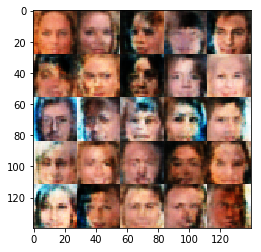

Epoch 1/1... Discriminator Loss: 0.9643... Generator Loss: 1.5170
Epoch 1/1... Discriminator Loss: 0.9742... Generator Loss: 1.0616
Epoch 1/1... Discriminator Loss: 0.9390... Generator Loss: 1.0856
Epoch 1/1... Discriminator Loss: 0.9843... Generator Loss: 0.9224
Epoch 1/1... Discriminator Loss: 0.9307... Generator Loss: 1.3344
Epoch 1/1... Discriminator Loss: 0.8926... Generator Loss: 1.4140
Epoch 1/1... Discriminator Loss: 0.9752... Generator Loss: 1.0899
Epoch 1/1... Discriminator Loss: 1.1051... Generator Loss: 1.0145
Epoch 1/1... Discriminator Loss: 0.9262... Generator Loss: 1.2315
Epoch 1/1... Discriminator Loss: 1.0943... Generator Loss: 0.8646


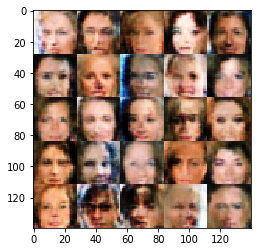

Epoch 1/1... Discriminator Loss: 0.9751... Generator Loss: 1.1985
Epoch 1/1... Discriminator Loss: 0.9450... Generator Loss: 1.2253
Epoch 1/1... Discriminator Loss: 1.0309... Generator Loss: 1.0895
Epoch 1/1... Discriminator Loss: 0.9109... Generator Loss: 1.2476
Epoch 1/1... Discriminator Loss: 0.8112... Generator Loss: 1.8804
Epoch 1/1... Discriminator Loss: 0.7737... Generator Loss: 1.3203
Epoch 1/1... Discriminator Loss: 0.8439... Generator Loss: 1.5104
Epoch 1/1... Discriminator Loss: 1.0453... Generator Loss: 1.1020
Epoch 1/1... Discriminator Loss: 0.9062... Generator Loss: 1.2766
Epoch 1/1... Discriminator Loss: 0.7752... Generator Loss: 1.6220


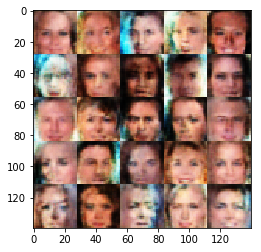

Epoch 1/1... Discriminator Loss: 1.0316... Generator Loss: 1.3300
Epoch 1/1... Discriminator Loss: 0.9572... Generator Loss: 1.2951
Epoch 1/1... Discriminator Loss: 0.9395... Generator Loss: 1.0751
Epoch 1/1... Discriminator Loss: 0.8436... Generator Loss: 1.4939
Epoch 1/1... Discriminator Loss: 1.0983... Generator Loss: 0.8200
Epoch 1/1... Discriminator Loss: 1.0029... Generator Loss: 1.3114
Epoch 1/1... Discriminator Loss: 0.8391... Generator Loss: 1.4422
Epoch 1/1... Discriminator Loss: 0.8350... Generator Loss: 1.5176
Epoch 1/1... Discriminator Loss: 1.0930... Generator Loss: 0.7987
Epoch 1/1... Discriminator Loss: 1.0401... Generator Loss: 1.1420


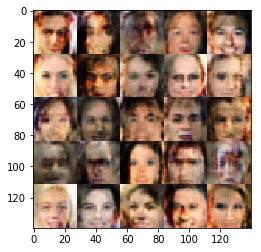

Epoch 1/1... Discriminator Loss: 0.9680... Generator Loss: 1.4045
Epoch 1/1... Discriminator Loss: 0.9485... Generator Loss: 1.6238
Epoch 1/1... Discriminator Loss: 0.9741... Generator Loss: 1.2981
Epoch 1/1... Discriminator Loss: 0.8280... Generator Loss: 1.2163
Epoch 1/1... Discriminator Loss: 1.1944... Generator Loss: 0.7209
Epoch 1/1... Discriminator Loss: 0.9241... Generator Loss: 1.4606
Epoch 1/1... Discriminator Loss: 1.1310... Generator Loss: 0.7647
Epoch 1/1... Discriminator Loss: 0.9208... Generator Loss: 1.0326
Epoch 1/1... Discriminator Loss: 0.7655... Generator Loss: 1.6180
Epoch 1/1... Discriminator Loss: 0.8672... Generator Loss: 1.0819


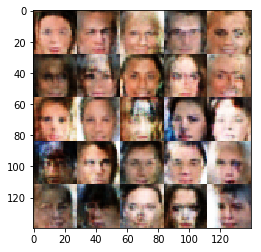

Epoch 1/1... Discriminator Loss: 0.8975... Generator Loss: 1.6378
Epoch 1/1... Discriminator Loss: 1.0866... Generator Loss: 0.8678
Epoch 1/1... Discriminator Loss: 0.9873... Generator Loss: 1.1930
Epoch 1/1... Discriminator Loss: 0.9331... Generator Loss: 1.6257
Epoch 1/1... Discriminator Loss: 1.0527... Generator Loss: 0.9767
Epoch 1/1... Discriminator Loss: 1.4016... Generator Loss: 0.5206
Epoch 1/1... Discriminator Loss: 0.9467... Generator Loss: 1.0776
Epoch 1/1... Discriminator Loss: 0.8310... Generator Loss: 1.3537
Epoch 1/1... Discriminator Loss: 0.9879... Generator Loss: 1.1194
Epoch 1/1... Discriminator Loss: 0.9484... Generator Loss: 1.0316


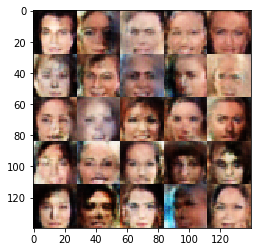

Epoch 1/1... Discriminator Loss: 0.8821... Generator Loss: 1.3991
Epoch 1/1... Discriminator Loss: 1.0282... Generator Loss: 0.9663
Epoch 1/1... Discriminator Loss: 0.8891... Generator Loss: 1.2185
Epoch 1/1... Discriminator Loss: 0.8907... Generator Loss: 1.4368
Epoch 1/1... Discriminator Loss: 1.0508... Generator Loss: 1.4471
Epoch 1/1... Discriminator Loss: 1.1836... Generator Loss: 0.7845
Epoch 1/1... Discriminator Loss: 0.8451... Generator Loss: 1.1863
Epoch 1/1... Discriminator Loss: 0.7324... Generator Loss: 1.6587
Epoch 1/1... Discriminator Loss: 0.9600... Generator Loss: 0.9898
Epoch 1/1... Discriminator Loss: 1.0147... Generator Loss: 0.8959


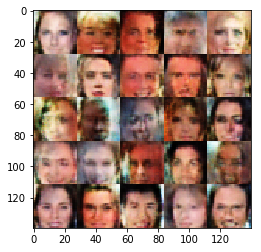

Epoch 1/1... Discriminator Loss: 0.9076... Generator Loss: 1.1260
Epoch 1/1... Discriminator Loss: 0.7550... Generator Loss: 1.3967
Epoch 1/1... Discriminator Loss: 0.9313... Generator Loss: 1.6293
Epoch 1/1... Discriminator Loss: 0.7708... Generator Loss: 1.9774
Epoch 1/1... Discriminator Loss: 0.7531... Generator Loss: 1.6630
Epoch 1/1... Discriminator Loss: 0.8939... Generator Loss: 1.0328
Epoch 1/1... Discriminator Loss: 0.9416... Generator Loss: 1.1251
Epoch 1/1... Discriminator Loss: 1.0456... Generator Loss: 0.9688
Epoch 1/1... Discriminator Loss: 1.3399... Generator Loss: 0.5878
Epoch 1/1... Discriminator Loss: 0.7468... Generator Loss: 1.7184


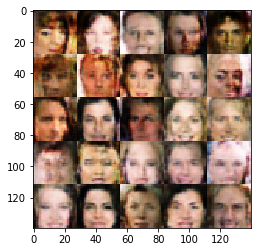

Epoch 1/1... Discriminator Loss: 0.9744... Generator Loss: 1.1136
Epoch 1/1... Discriminator Loss: 0.8383... Generator Loss: 1.2603
Epoch 1/1... Discriminator Loss: 0.8810... Generator Loss: 1.3415
Epoch 1/1... Discriminator Loss: 0.7081... Generator Loss: 2.0847
Epoch 1/1... Discriminator Loss: 1.0314... Generator Loss: 0.9399
Epoch 1/1... Discriminator Loss: 1.1121... Generator Loss: 0.9177
Epoch 1/1... Discriminator Loss: 1.1592... Generator Loss: 0.7410
Epoch 1/1... Discriminator Loss: 1.1532... Generator Loss: 0.7457
Epoch 1/1... Discriminator Loss: 0.9379... Generator Loss: 1.3740
Epoch 1/1... Discriminator Loss: 1.2176... Generator Loss: 0.8431


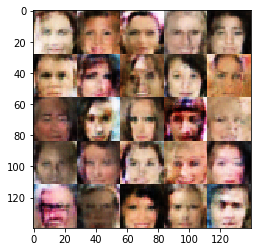

Epoch 1/1... Discriminator Loss: 1.0251... Generator Loss: 1.0889
Epoch 1/1... Discriminator Loss: 1.0563... Generator Loss: 1.0783
Epoch 1/1... Discriminator Loss: 1.2188... Generator Loss: 0.6834
Epoch 1/1... Discriminator Loss: 0.9163... Generator Loss: 1.2410
Epoch 1/1... Discriminator Loss: 0.8010... Generator Loss: 1.1979
Epoch 1/1... Discriminator Loss: 1.1188... Generator Loss: 0.7973
Epoch 1/1... Discriminator Loss: 1.1325... Generator Loss: 1.4656
Epoch 1/1... Discriminator Loss: 1.4334... Generator Loss: 0.4831
Epoch 1/1... Discriminator Loss: 0.9882... Generator Loss: 1.3521
Epoch 1/1... Discriminator Loss: 1.1872... Generator Loss: 0.8059


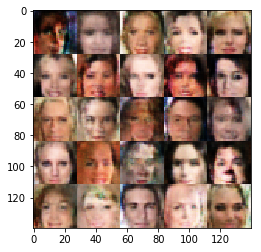

Epoch 1/1... Discriminator Loss: 0.9022... Generator Loss: 1.1026
Epoch 1/1... Discriminator Loss: 1.1878... Generator Loss: 0.7182
Epoch 1/1... Discriminator Loss: 0.8940... Generator Loss: 1.2840
Epoch 1/1... Discriminator Loss: 0.9059... Generator Loss: 1.2715
Epoch 1/1... Discriminator Loss: 1.3597... Generator Loss: 0.5893
Epoch 1/1... Discriminator Loss: 0.9676... Generator Loss: 1.1039
Epoch 1/1... Discriminator Loss: 0.9869... Generator Loss: 1.2085
Epoch 1/1... Discriminator Loss: 0.9305... Generator Loss: 1.1055
Epoch 1/1... Discriminator Loss: 0.9104... Generator Loss: 1.1179
Epoch 1/1... Discriminator Loss: 0.8700... Generator Loss: 1.3882


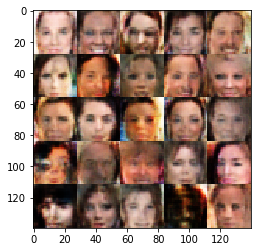

Epoch 1/1... Discriminator Loss: 0.9150... Generator Loss: 1.1312
Epoch 1/1... Discriminator Loss: 0.9984... Generator Loss: 1.2374
Epoch 1/1... Discriminator Loss: 1.1080... Generator Loss: 0.8385
Epoch 1/1... Discriminator Loss: 1.0716... Generator Loss: 0.9211
Epoch 1/1... Discriminator Loss: 1.1686... Generator Loss: 0.8421
Epoch 1/1... Discriminator Loss: 1.1035... Generator Loss: 0.7864
Epoch 1/1... Discriminator Loss: 1.1891... Generator Loss: 0.7107
Epoch 1/1... Discriminator Loss: 1.1274... Generator Loss: 0.7637
Epoch 1/1... Discriminator Loss: 1.0986... Generator Loss: 1.0182
Epoch 1/1... Discriminator Loss: 1.1027... Generator Loss: 0.7652


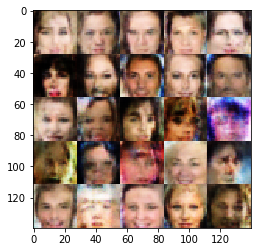

Epoch 1/1... Discriminator Loss: 1.1848... Generator Loss: 0.6940
Epoch 1/1... Discriminator Loss: 1.2131... Generator Loss: 0.6956
Epoch 1/1... Discriminator Loss: 0.9997... Generator Loss: 1.4277
Epoch 1/1... Discriminator Loss: 0.8741... Generator Loss: 1.2943
Epoch 1/1... Discriminator Loss: 1.2284... Generator Loss: 0.7647
Epoch 1/1... Discriminator Loss: 0.9388... Generator Loss: 1.0460
Epoch 1/1... Discriminator Loss: 1.1620... Generator Loss: 0.7272
Epoch 1/1... Discriminator Loss: 0.7806... Generator Loss: 1.3551
Epoch 1/1... Discriminator Loss: 0.8226... Generator Loss: 1.2900
Epoch 1/1... Discriminator Loss: 1.4986... Generator Loss: 0.5606


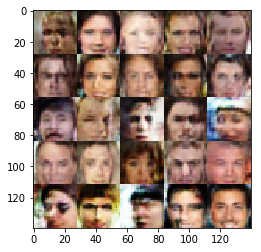

Epoch 1/1... Discriminator Loss: 0.9843... Generator Loss: 0.9497
Epoch 1/1... Discriminator Loss: 1.1873... Generator Loss: 0.8149
Epoch 1/1... Discriminator Loss: 0.9738... Generator Loss: 1.3439
Epoch 1/1... Discriminator Loss: 1.2047... Generator Loss: 0.7270
Epoch 1/1... Discriminator Loss: 0.8493... Generator Loss: 1.3046
Epoch 1/1... Discriminator Loss: 1.2222... Generator Loss: 0.6735
Epoch 1/1... Discriminator Loss: 0.8583... Generator Loss: 1.1613
Epoch 1/1... Discriminator Loss: 0.8987... Generator Loss: 1.3112
Epoch 1/1... Discriminator Loss: 1.0342... Generator Loss: 0.9962
Epoch 1/1... Discriminator Loss: 0.9589... Generator Loss: 1.3805


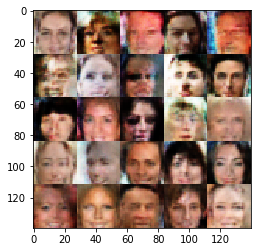

Epoch 1/1... Discriminator Loss: 0.9323... Generator Loss: 1.1999
Epoch 1/1... Discriminator Loss: 1.1588... Generator Loss: 0.9650
Epoch 1/1... Discriminator Loss: 1.1985... Generator Loss: 0.7234
Epoch 1/1... Discriminator Loss: 1.1553... Generator Loss: 0.8866
Epoch 1/1... Discriminator Loss: 1.1051... Generator Loss: 0.7878
Epoch 1/1... Discriminator Loss: 1.0551... Generator Loss: 1.0031
Epoch 1/1... Discriminator Loss: 1.0273... Generator Loss: 0.9083
Epoch 1/1... Discriminator Loss: 1.0872... Generator Loss: 1.5515
Epoch 1/1... Discriminator Loss: 1.2662... Generator Loss: 0.7826
Epoch 1/1... Discriminator Loss: 0.9852... Generator Loss: 0.9868


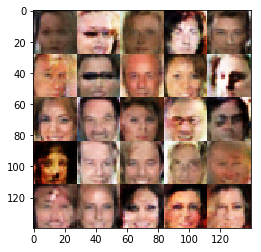

Epoch 1/1... Discriminator Loss: 1.1625... Generator Loss: 0.7811
Epoch 1/1... Discriminator Loss: 1.4814... Generator Loss: 0.5480
Epoch 1/1... Discriminator Loss: 1.3973... Generator Loss: 0.5675
Epoch 1/1... Discriminator Loss: 0.9731... Generator Loss: 1.0143
Epoch 1/1... Discriminator Loss: 1.1443... Generator Loss: 1.2146
Epoch 1/1... Discriminator Loss: 1.0990... Generator Loss: 0.9967
Epoch 1/1... Discriminator Loss: 1.1366... Generator Loss: 0.7578
Epoch 1/1... Discriminator Loss: 1.1236... Generator Loss: 0.7321
Epoch 1/1... Discriminator Loss: 1.0422... Generator Loss: 1.0055
Epoch 1/1... Discriminator Loss: 0.9365... Generator Loss: 1.2418


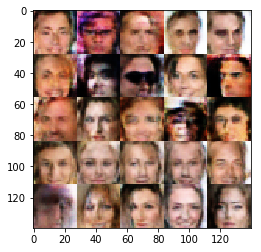

Epoch 1/1... Discriminator Loss: 1.0596... Generator Loss: 0.8743
Epoch 1/1... Discriminator Loss: 0.9245... Generator Loss: 1.3565
Epoch 1/1... Discriminator Loss: 1.1419... Generator Loss: 0.8552
Epoch 1/1... Discriminator Loss: 0.8023... Generator Loss: 1.4376
Epoch 1/1... Discriminator Loss: 1.0431... Generator Loss: 1.2818
Epoch 1/1... Discriminator Loss: 0.9743... Generator Loss: 1.1172
Epoch 1/1... Discriminator Loss: 0.8527... Generator Loss: 1.5902
Epoch 1/1... Discriminator Loss: 1.0842... Generator Loss: 0.8153
Epoch 1/1... Discriminator Loss: 1.1762... Generator Loss: 1.1560
Epoch 1/1... Discriminator Loss: 1.0671... Generator Loss: 1.0160


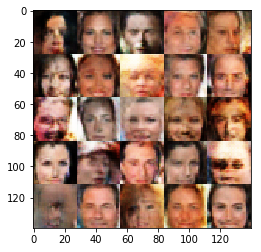

Epoch 1/1... Discriminator Loss: 1.0129... Generator Loss: 1.0299
Epoch 1/1... Discriminator Loss: 1.2127... Generator Loss: 0.7051
Epoch 1/1... Discriminator Loss: 0.8552... Generator Loss: 1.2640
Epoch 1/1... Discriminator Loss: 0.8159... Generator Loss: 1.2224
Epoch 1/1... Discriminator Loss: 1.2992... Generator Loss: 0.5876
Epoch 1/1... Discriminator Loss: 1.1790... Generator Loss: 1.5330
Epoch 1/1... Discriminator Loss: 1.6944... Generator Loss: 0.3857
Epoch 1/1... Discriminator Loss: 1.0868... Generator Loss: 0.8544
Epoch 1/1... Discriminator Loss: 1.2967... Generator Loss: 0.6169
Epoch 1/1... Discriminator Loss: 1.2647... Generator Loss: 0.8101


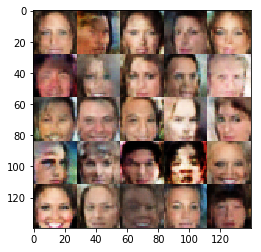

Epoch 1/1... Discriminator Loss: 1.0462... Generator Loss: 0.9551
Epoch 1/1... Discriminator Loss: 1.2380... Generator Loss: 0.6780
Epoch 1/1... Discriminator Loss: 0.8545... Generator Loss: 1.4614
Epoch 1/1... Discriminator Loss: 1.0622... Generator Loss: 1.1137
Epoch 1/1... Discriminator Loss: 1.0308... Generator Loss: 0.8950
Epoch 1/1... Discriminator Loss: 1.1913... Generator Loss: 0.9514
Epoch 1/1... Discriminator Loss: 0.9808... Generator Loss: 1.0202
Epoch 1/1... Discriminator Loss: 1.0436... Generator Loss: 1.1828
Epoch 1/1... Discriminator Loss: 1.1570... Generator Loss: 0.7299
Epoch 1/1... Discriminator Loss: 1.0540... Generator Loss: 0.9624


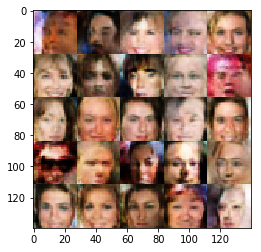

Epoch 1/1... Discriminator Loss: 1.1740... Generator Loss: 0.8020
Epoch 1/1... Discriminator Loss: 1.3145... Generator Loss: 0.6612
Epoch 1/1... Discriminator Loss: 1.0529... Generator Loss: 0.7968
Epoch 1/1... Discriminator Loss: 0.9919... Generator Loss: 1.2526
Epoch 1/1... Discriminator Loss: 1.0918... Generator Loss: 0.8896
Epoch 1/1... Discriminator Loss: 1.0949... Generator Loss: 0.7614
Epoch 1/1... Discriminator Loss: 0.7565... Generator Loss: 1.3771
Epoch 1/1... Discriminator Loss: 1.0454... Generator Loss: 0.8562
Epoch 1/1... Discriminator Loss: 1.3055... Generator Loss: 0.6849
Epoch 1/1... Discriminator Loss: 0.8314... Generator Loss: 1.3598


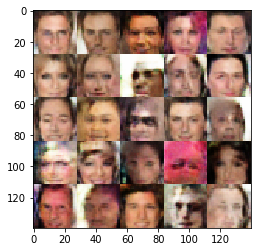

Epoch 1/1... Discriminator Loss: 1.1333... Generator Loss: 0.7923
Epoch 1/1... Discriminator Loss: 1.2402... Generator Loss: 0.6520
Epoch 1/1... Discriminator Loss: 1.0339... Generator Loss: 0.9737
Epoch 1/1... Discriminator Loss: 1.2054... Generator Loss: 0.8695
Epoch 1/1... Discriminator Loss: 1.4406... Generator Loss: 0.5661
Epoch 1/1... Discriminator Loss: 1.0615... Generator Loss: 0.9613
Epoch 1/1... Discriminator Loss: 1.0905... Generator Loss: 0.8095
Epoch 1/1... Discriminator Loss: 1.1283... Generator Loss: 0.7937
Epoch 1/1... Discriminator Loss: 1.1740... Generator Loss: 0.8171
Epoch 1/1... Discriminator Loss: 1.0856... Generator Loss: 0.8799


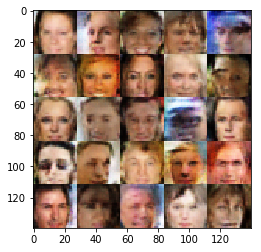

Epoch 1/1... Discriminator Loss: 0.9883... Generator Loss: 0.8723
Epoch 1/1... Discriminator Loss: 1.0062... Generator Loss: 0.9105
Epoch 1/1... Discriminator Loss: 1.0289... Generator Loss: 0.9131
Epoch 1/1... Discriminator Loss: 1.0171... Generator Loss: 0.8845
Epoch 1/1... Discriminator Loss: 1.0746... Generator Loss: 0.9259
Epoch 1/1... Discriminator Loss: 1.2044... Generator Loss: 0.6929


In [12]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.